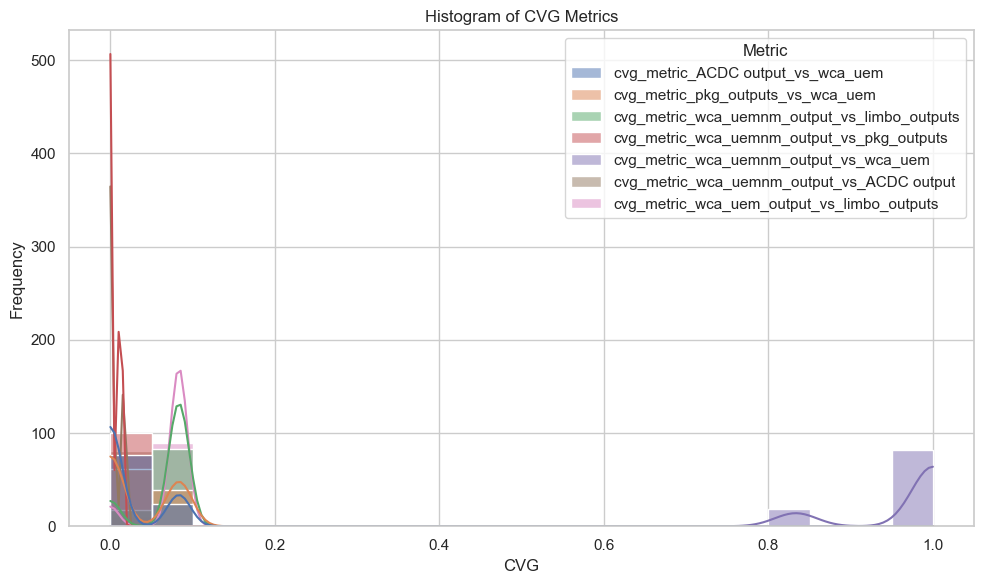

In [2]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

file_paths = ['./cvg_for_same_commit/cvg_metric_ACDC output_vs_wca_uem_output.json',
              './cvg_for_same_commit/cvg_metric_pkg_outputs_vs_wca_uem_output.json',
              './cvg_for_same_commit/cvg_metric_pkg_outputs_vs_wca_uem_output.json',
              './cvg_for_same_commit/cvg_metric_ACDC output_vs_wca_uem_output.json',
              './cvg_for_same_commit/cvg_metric_wca_uemnm_output_vs_limbo_outputs.json',
              './cvg_for_same_commit/cvg_metric_wca_uemnm_output_vs_pkg_outputs.json',
              './cvg_for_same_commit/cvg_metric_wca_uemnm_output_vs_wca_uem_output.json',
              './cvg_for_same_commit/cvg_metric_wca_uemnm_output_vs_ACDC output.json',
              './cvg_for_same_commit/cvg_metric_wca_uem_output_vs_limbo_outputs.json']

cvg_values = {}
for file_path in file_paths:
    file_name = os.path.basename(file_path).split('/')[-1].replace('_output.json', '').replace('cvg_metric_','')
    with open(file_path, 'r') as f:
        data = json.load(f)
    cvg_values[file_name] = [float(value) for value in data.values() if value != "NaN"]
cvg_values = {key.replace('.json', ''): value for key, value in cvg_values.items()}
plot_data = [(key, val) for key, values in cvg_values.items() for val in values]
df = pd.DataFrame(plot_data, columns=['Metric', 'CVG'])
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df, x='CVG', hue='Metric', bins=20, kde=True)
plt.title('Histogram of CVG Metrics')
plt.xlabel('CVG')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


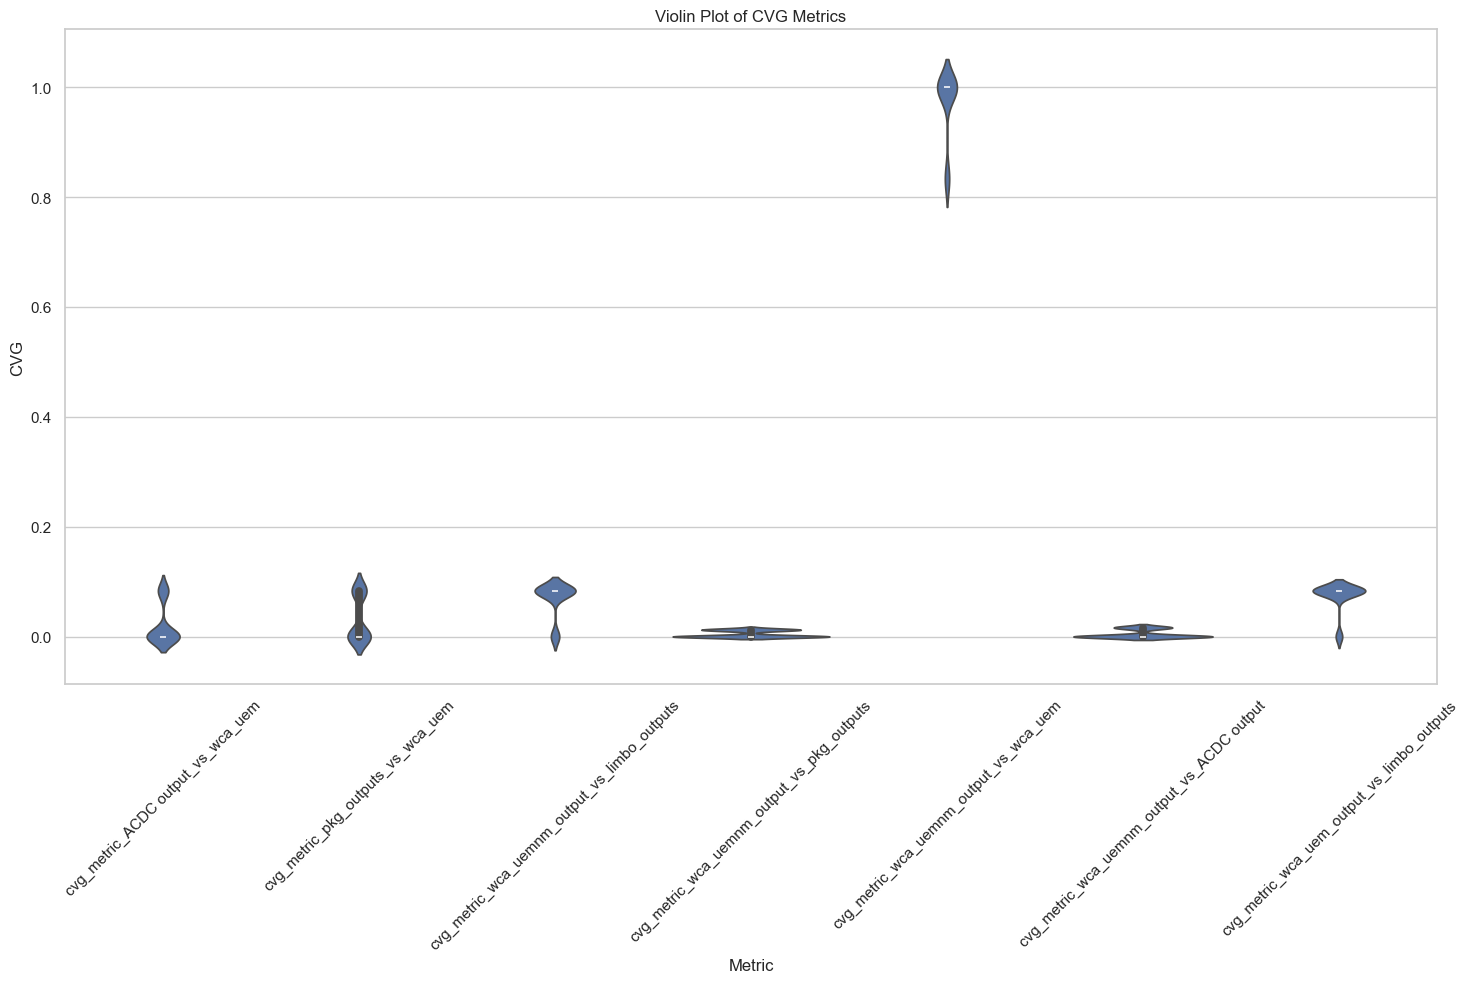

In [3]:
# Violin plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
sns.violinplot(x='Metric', y='CVG', data=df, ax=axes)
axes.set_title('Violin Plot of CVG Metrics')
axes.set_xlabel('Metric')
axes.set_ylabel('CVG')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


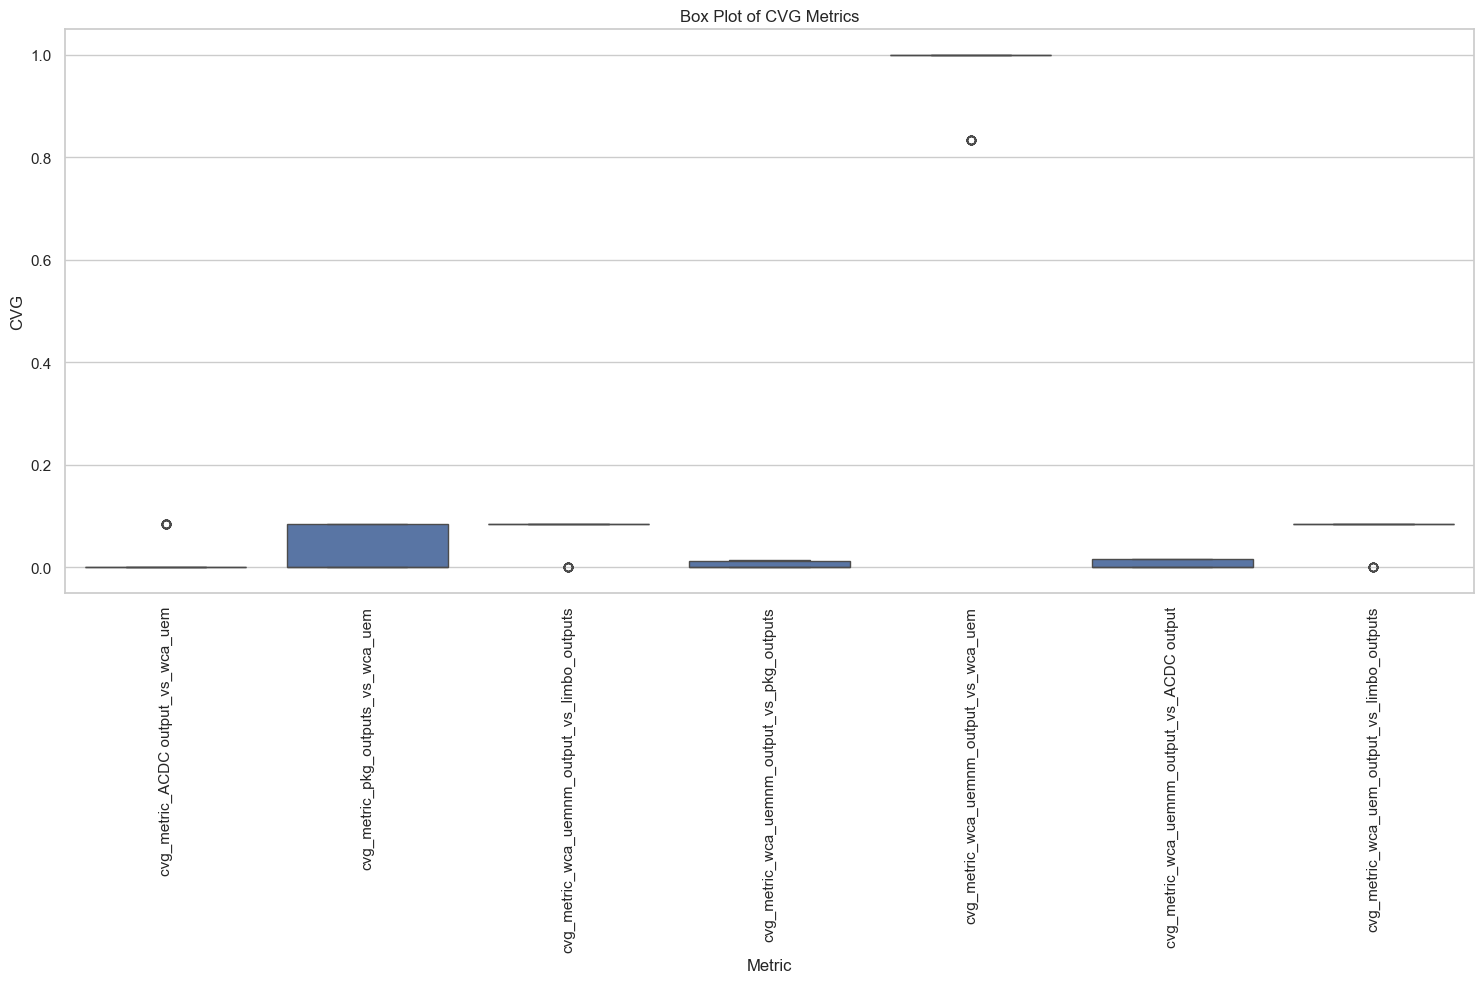

In [4]:
# Box plot with rotated x-axis labels
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
sns.boxplot(x='Metric', y='CVG', data=df, ax=axes)
axes.set_title('Box Plot of CVG Metrics')
axes.set_xlabel('Metric')
axes.set_ylabel('CVG')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [5]:
from scipy.stats import kruskal


In [6]:
# Kruskal-Wallis test
metrics = df['Metric'].unique()
metric_data = [df[df['Metric'] == metric]['CVG'] for metric in metrics]
h_stat, p_value = kruskal(*metric_data)

# Define results dictionary
kruskal_results = {
    "Kruskal-Wallis_Test_task3_Results": {
        "H-statistic": h_stat,
        "P-value": p_value,
        "Significance": "There are significant differences among the groups." if p_value < 0.05 else "There are no significant differences among the groups."
    }
}

# Print test results
print("Kruskal-Wallis Test Results:")
print(f"H-statistic: {h_stat}")
print(f"P-value: {p_value}")
print(kruskal_results["Kruskal-Wallis_Test_task3_Results"]["Significance"])


Kruskal-Wallis Test Results:
H-statistic: 443.03001404866774
P-value: 1.5522160823129464e-92
There are significant differences among the groups.


In [7]:
import scikit_posthocs as sp

# Perform Dunn's test for post hoc analysis if Kruskal-Wallis is significant
if p_value < 0.05:
    posthoc_results = sp.posthoc_dunn(df, val_col='CVG', group_col='Metric', p_adjust='bonferroni')
    posthoc_dict = posthoc_results.to_dict()
    kruskal_results["Dunn_Posthoc_Test_Results"] = posthoc_dict

# Save results to JSON file
file_path = 'Significance_test_result.json'
with open(file_path, 'w') as json_file:
    json.dump(kruskal_results, json_file)

print(f"Results saved to {file_path}")


Results saved to Significance_test_result.json
